In [ ]:
!pip install geopandas

In [ ]:

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-5en1j14p
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-5en1j14

In [ ]:
import os
import json
import requests
import pandas as pd

import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import geopandas
import geoplot
import mapclassify
import descartes
from shapely.geometry import Point, Polygon


In [ ]:
# Se carga el archivo desde ordenador loca
#from google.colab import files
#files.upload()

# se vincula el drive para utilizar los archivos

from google.colab import drive

drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive/ProyectosComf2020/Georref'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/17mKKlfaHGnEzsg6ajrtbFcVV0nzY-N_k/Georref


In [ ]:
!pwd

/content/gdrive/.shortcut-targets-by-id/17mKKlfaHGnEzsg6ajrtbFcVV0nzY-N_k/Georref


In [ ]:
# Cargar la capa temática
IPM = "Manz_Per_IPM.geojson"
map_data = geopandas.read_file(IPM)
map_data.head()

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,geometry
0,66,66001,6600110000000001010101,4.0,Vulnerabilidad baja,0.0,"MULTIPOLYGON (((-75.71790 4.81576, -75.71794 4..."
1,66,66001,6600110000000001010102,4.0,Vulnerabilidad baja,0.0,"MULTIPOLYGON (((-75.71658 4.81591, -75.71660 4..."
2,66,66001,6600110000000001010103,4.0,Vulnerabilidad baja,0.0,"MULTIPOLYGON (((-75.71530 4.81600, -75.71532 4..."
3,66,66001,6600110000000001010104,4.0,Vulnerabilidad baja,0.0,"MULTIPOLYGON (((-75.71470 4.81610, -75.71471 4..."
4,66,66001,6600110000000001010105,2.0,Vulnerabilidad media-baja,12.1,"MULTIPOLYGON (((-75.71277 4.81600, -75.71285 4..."


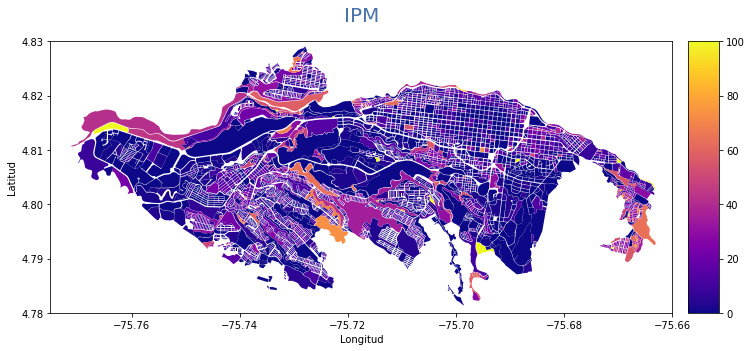

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-75.775, -75.66 , 4.78, 4.83])
 
# Control del título y los ejes
ax.set_title('IPM', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='ipm', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 

In [ ]:
Comunas = geopandas.read_file('Comunas_Pereira2.geojson')
Comunas.head(3)

,Id,NOM_COMUNA,geometry
0,0,PERLA DEL OTÚN,"MULTIPOLYGON (((-75.73419 4.79939, -75.73393 4..."
1,0,EL OSO,"MULTIPOLYGON (((-75.73721 4.80339, -75.73715 4..."
2,0,CONSOTA,"MULTIPOLYGON (((-75.73493 4.80578, -75.73450 4..."


In [ ]:
base_comp = pd.read_excel('Base_Enf_Huer.xlsx')
base_coor = base_comp[['ID', 'lat_resi', 'long_resi', 'Clas_ENF','nmun_resi']].dropna()
base_per = base_coor[(base_coor['Clas_ENF'] == 'Enfermedades del sistema hematologico')]

base_per2 = geopandas.GeoDataFrame(
    base_per, geometry=geopandas.points_from_xy(base_per.long_resi, base_per.lat_resi))

base_per2.head(3)

,ID,lat_resi,long_resi,Clas_ENF,nmun_resi,geometry
85,ID0086,4.794842,-75.733890,Enfermedades del sistema hematologico,PEREIRA,POINT (-75.73389 4.79484)
277,ID0284,4.817860,-75.702766,Enfermedades del sistema hematologico,PEREIRA,POINT (-75.70277 4.81786)
281,ID0288,4.732746,-75.913660,Enfermedades del sistema hematologico,CARTAGO,POINT (-75.91366 4.73275)


In [ ]:
'''
ax = geoplot.kdeplot(
    df=base_per2, clip=Comunas.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())

geoplot.polyplot(Comunas, ax=ax, zorder=1)
'''

"\nax = geoplot.kdeplot(\n    df=base_per2, clip=Comunas.geometry,\n    shade=True, cmap='Reds',\n    projection=geoplot.crs.AlbersEqualArea())\n\ngeoplot.polyplot(Comunas, ax=ax, zorder=1)\n"

Ejemplo  (https://geopandas.org/gallery/plotting_with_geoplot.html)

In [ ]:
#   Archivos de ejemplo 

boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs'))


collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions'))

In [ ]:
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [ ]:
collisions

,id,NUMBER OF PERSONS INJURED,BOROUGH,geometry
0,11,1,BROOKLYN,POINT (-73.94268 40.67650)
1,21,1,MANHATTAN,POINT (-74.00834 40.72132)
2,27,1,BROOKLYN,POINT (-73.97076 40.68764)
3,28,1,BRONX,POINT (-73.83874 40.88127)
4,33,1,BROOKLYN,POINT (-73.98873 40.59300)
...,...,...,...,...
20639,920296,1,MANHATTAN,POINT (-73.98786 40.72270)
20640,920302,1,BROOKLYN,POINT (-73.99766 40.63837)
20641,920312,1,MANHATTAN,POINT (-73.95632 40.80312)
20642,920313,2,BROOKLYN,POINT (-73.96255 40.71253)


In [ ]:
ax = geoplot.kdeplot(
    collisions.head(100), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())



Geometry must be a Point or LineString


In [ ]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp37-none-any.whl size=28556 sha256=9ee588a67f1144a7cb74b2b0bbc2634449d0b0c088f430d97f411384e1693743
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [ ]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mplleaflet

boston_airbnb_listings = gpd.read_file(gplt.datasets.get_path('boston_airbnb_listings'))

ax = gplt.kdeplot(
    boston_airbnb_listings, cmap='viridis', projection=gcrs.WebMercator(), figsize=(12, 12),
    shade=True
)
gplt.pointplot(boston_airbnb_listings, s=1, color='black', ax=ax)
gplt.webmap(boston_airbnb_listings, ax=ax)
plt.title('Boston AirBnB Locations, 2016', fontsize=18)

fig = plt.gcf()
plt.savefig("boston-airbnb-kde.png", bbox_inches='tight', pad_inches=0.1)
# mplleaflet.show(fig)

Geometry must be a Point or LineString
